# The $k$-nearest neighbors (KNN, $k$-NN) algorithm

Authors:

Joseph Salmon, Alexandre Gramfort, Claire Vernade, Mathurin Massias

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy import stats
from sklearn import neighbors
from sklearn import datasets
from sklearn.metrics import pairwise_distances
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


from tp_knn_source import (rand_gauss, rand_bi_gauss, rand_tri_gauss,
                           rand_checkers, rand_clown, plot_2d, ErrorCurve,
                           frontiere_new, LOOCurve)


import seaborn as sns
from matplotlib import rc

plt.close('all')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 16,
          'legend.fontsize': 16,
          'text.usetex': False,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.set_style("white")
_ = sns.axes_style()


## Data generation

### Question 1


In [2]:
np.random.seed(42)  # fix seed globally

n = 100
# infer the parameters and choose their values
mu, sigma = [1, 1], [0.1, 0.1]
rand_gauss(n, mu, sigma)

n1_1 = 20
n2_1 = 20
# TODO for four functions
X1, y1 = rand_bi_gauss(n1_1, n2_1)

n1_2 = 50
n2_2 = 50
n3_2 = 50
X2, y2 = rand_tri_gauss(n1_2, n2_2, n3_2)

n1_3 = 500
n2_3 = 500

X3, y3 = rand_checkers(n1_3, n2_3, 0.1)

n1_4 = 150
n2_4 = 150
X4, y4 = rand_clown(n1_4, n2_4)


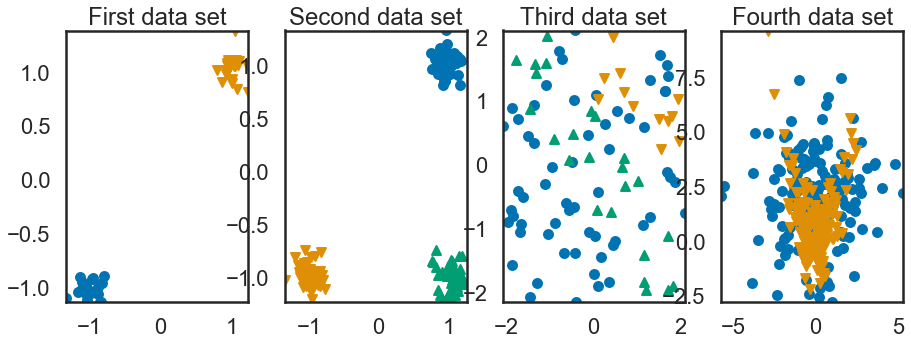

In [3]:
############################################################################
#     Displaying labeled data
############################################################################

plt.show()
plt.close("all")
plt.ion()
plt.figure(1, figsize=(15, 5))
plt.subplot(141)
plt.title('First data set')
plot_2d(X1, y1)

plt.subplot(142)
plt.title('Second data set')
plot_2d(X2, y2)

plt.subplot(143)
plt.title('Third data set')
plot_2d(X3, y3)

plt.subplot(144)
plt.title('Fourth data set')
plot_2d(X4, y4)


The First data set gives two gaussian distributions with given number of samples for each distribution and given params as mu and sigma <br>
__________________________________
The Second data set gives three gaussian distributions with given number of samples for each distribution and given params as mu and sigma <br>
___________________
The Third data set gives random noisy sample with a shape of  ${(int(n1/8)+int(n2/8))*8}$  with given n1 and n2 and mus and sigmas<br>
____
The Fourth data set gives two distributions with given number of samples for each distribution and given params as mu and sigma,<br> but the first distribution coordinates are equal to  <br> ${(FirstNormalDistributionN1 ,}$<br>${ FirstNormalDistributionN1 * FirstNormalDistributionN1 + sigma1 * SecondNormalDistributionN1)}$<br>
The second coordinates are equal to ${(sigma2 * FirstNormalDistributionN2 , sigma2 * SecondNormalDistributionN2 + 2 \sigma)}$<br>
________

### Question 2


As an adaptation of this algorithm to regression, the predicted value could be the mean of nearest neighbors value (for example, if k =11 so the value will be ${(valuesOfElevenNearestNeighbors) /11}$)

## The $k$-NN algorithm

In [4]:
d = np.array([5, 1, 2, 4])
ind = np.argsort(d)
ind[:2]


array([1, 2], dtype=int64)

### walo

In [70]:
# Write your own implementation

class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""

    def __init__(self, n_neighbors=1, weight=None):
        self.n_neighbors = n_neighbors
        self.weight = weight

    def fit(self, X, y):
        # no work is done at fit time, except storing training data
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        # TODO : Compute all pairwise distances between X and self.X_
        d = pairwise_distances(X, self.X_)

        # TODO : Get indices to sort them
        sorted_indices = np.argsort(d)
        # TODO Get indices of neighbors
        neighbors_indices = sorted_indices[:, :self.n_neighbors]

        # TODO: Get labels of neighbors
        Y_neighbors = self.y_[neighbors_indices]
        # TODO : Find the predicted labels y for each entry in X
        # You can use the scipy.stats.mode function
        y_pred, _ = stats.mode(Y_neighbors, axis=1)
        # y_pred = np.array([np.unique(a)[np.argmax(np.array([np.sum(np.where(a == i, 1, 0))
        #                          for i in np.unique(a)]))] for a in Y_neighbors])
        return y_pred.ravel()


# TODO : compare your implementation with scikit-learn
n_neighbors = 3

# Focus on dataset 2
index_train_test = int(4 * (n2_2 + n2_1) / 5)
X_train = X2[:index_train_test]
Y_train = y2[:index_train_test]
X_test = X2[index_train_test:]
Y_test = y2[index_train_test:]

# TODO

# your classifier

knn = KNNClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
sknn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
sknn.fit(X_train, Y_train)
Y_pred_skl = sknn.predict(X_test)

# print(f"The matching : {(Y_pred==Y_pred_skl)}\n")

print(f"The accuracy value is {(Y_pred==Y_pred_skl).sum()/len(Y_test)}")

# TODO check that all labels match

# From now on use the Scikit-Learn implementation


[[1. 1. 1.]
 [3. 3. 3.]
 [2. 2. 2.]
 [3. 3. 3.]
 [1. 1. 1.]
 [2. 2. 2.]
 [2. 2. 2.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [3. 3. 3.]
 [1. 1. 1.]
 [3. 3. 3.]
 [1. 1. 1.]
 [3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]
 [1. 1. 1.]
 [1. 1. 1.]
 [2. 2. 2.]
 [1. 1. 1.]
 [2. 2. 2.]
 [1. 1. 1.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [1. 1. 1.]
 [3. 3. 3.]
 [3. 3. 3.]
 [2. 2. 2.]
 [3. 3. 3.]
 [3. 3. 3.]
 [2. 2. 2.]
 [3. 3. 3.]
 [3. 3. 3.]
 [2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]
 [3. 3. 3.]
 [1. 1. 1.]
 [3. 3. 3.]
 [1. 1. 1.]
 [3. 3. 3.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]
 [1. 1. 1.]
 [2. 2. 2.]
 [1. 1. 1.]
 [3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]
 [1. 1. 1.]
 [1. 1. 1.]
 [2. 2. 2.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [3. 3. 3.]
 [2. 2. 2.]
 [3. 3. 3.]
 [2. 2. 2.]
 [2. 2. 2.]
 [3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]
 [1. 1. 1.]
 [3. 3. 3.]
 [1.

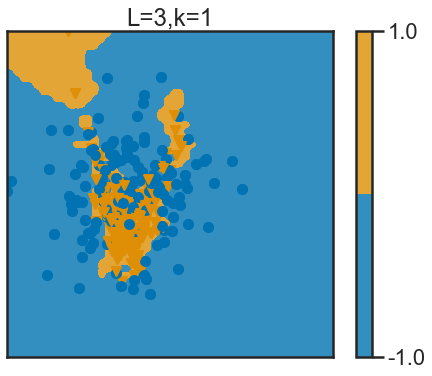

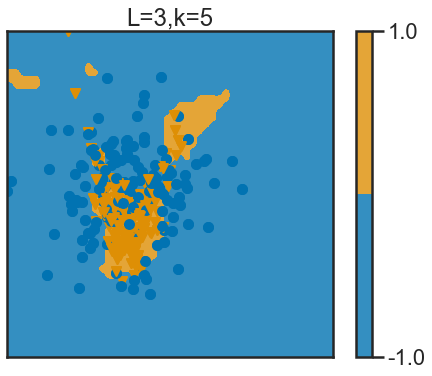

In [6]:
# question 4
n1 = n2 = 200
sigma = 0.1
X, y = X4, y4


def KnnWithFrontiere(n_neighbors=1, X=X, y=y):
 # the k in k-NN
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)
    plt.figure()
    plot_2d(X, y)
    n_labels = 3
    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1,
                  n_labels=n_labels, n_neighbors=n_neighbors)


KnnWithFrontiere(1)
KnnWithFrontiere(5)


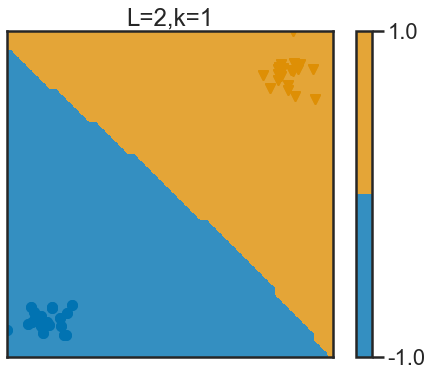

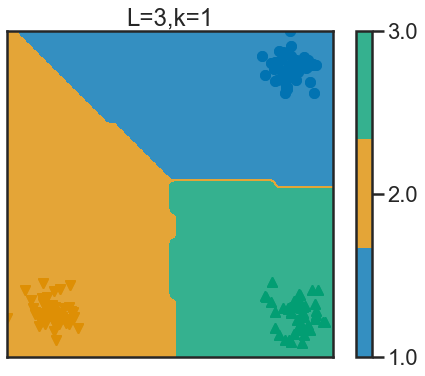

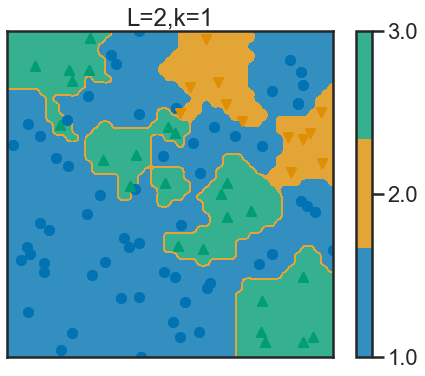

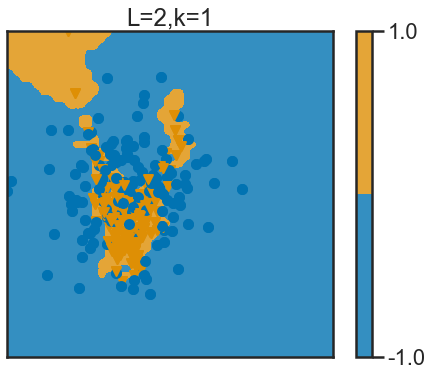

In [7]:
# test now for all datasets

n_neighbors = 1  # the k in k-NN
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)


# TODO something like:
for (X, y, n) in [(X1, y1, 2), (X2, y2, 3), (X3, y3, 2), (X4, y4, 2)]:

    # TODO: fit your knn in the loop
    knn.fit(X, y)
    plt.figure()
    plot_2d(X, y)
    n_labels = n
    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1,
                  n_labels=n_labels, n_neighbors=n_neighbors)


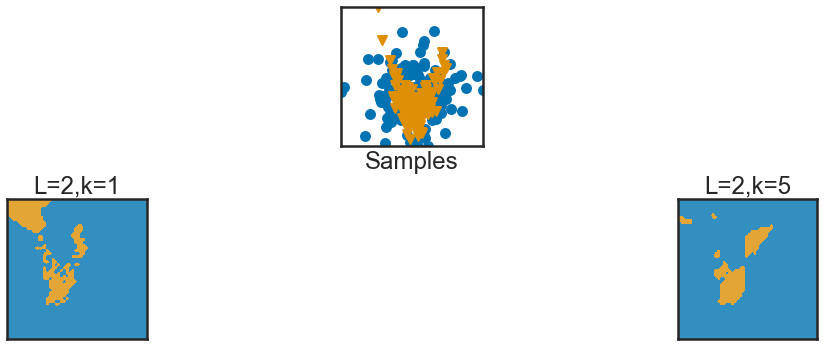

In [8]:
# Display the predictions when varying the value of k

n1 = n2 = 200
sigma = 0.1
X, y = X4, y4
plt.figure(3, figsize=(12, 8))
plt.subplot(3, 5, 3)
plot_2d(X, y)
plt.xlabel('Samples')
ax = plt.gca()
ax.get_yaxis().set_ticks([])
ax.get_xaxis().set_ticks([])

for n_neighbors in (1, 5):
    # TODO
    plt.subplot(3, 5, 5 + n_neighbors)
    # todo put a label indicating the number of neighbors used in the algo
    knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X, y)

    frontiere_new(knn, X, y, w=None, step=50, alpha_choice=1, n_labels=2,
                  colorbar=False, samples=False, n_neighbors=n_neighbors)
    plt.draw()  # update plot

plt.tight_layout()


In [4]:
# Scores on train data
n_neighbors = 1
n1 = n2 = 200
sigma = 0.1
X_train = X3[::2]
Y_train = y3[::2].astype(int)
X_test = X3[1::2]
Y_test = y3[1::2].astype(int)
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, Y_train)
print(f"the score on training is :{knn.score(X_train,Y_train)}")
print(f"the score on testing is :{knn.score(X_test,Y_test)}")

# TODO use knn.score, on test and train


the score on training is :1.0
the score on testing is :0.7916666666666666


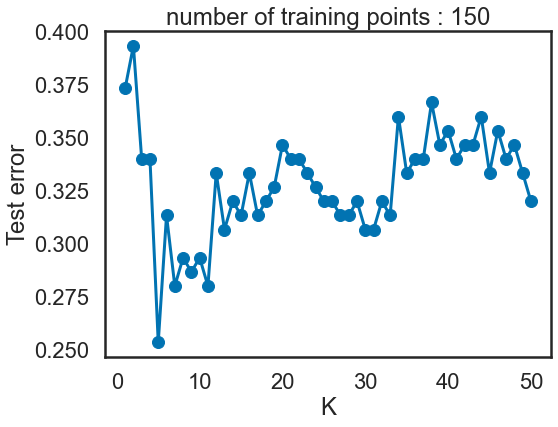

In [10]:
# Scores on left out data

n1 = n2 = 200
sigma = 0.1
data4 = rand_checkers(2 * n1, 2 * n2, sigma)

X_train = X4[::2]
Y_train = y4[::2].astype(int)
X_test = X4[1::2]
Y_test = y4[1::2].astype(int)


# TODO instantiate ErrorCurve with k_range=range(1, 51)
error_curve = ErrorCurve(k_range=range(1, 51))
# TODO fit it, plot it
error_curve.fit_curve(X_train, Y_train, X_test, Y_test)
error_curve.plot()


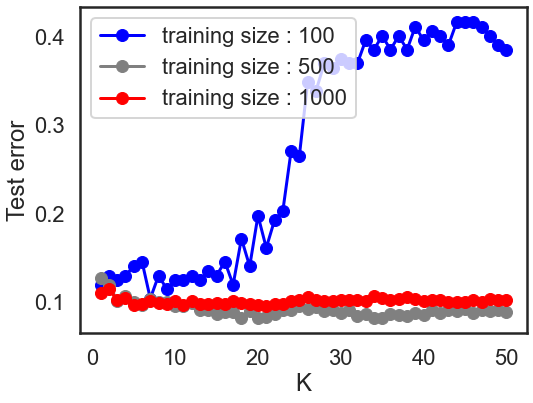

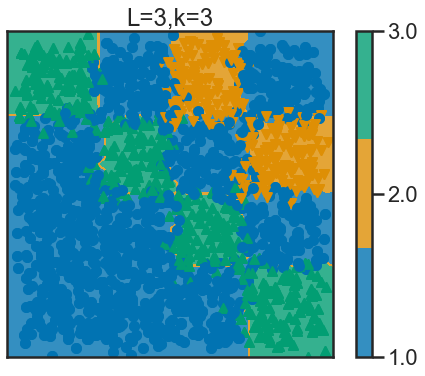

In [11]:
collist = ['blue', 'grey', 'red', 'purple', 'orange', 'salmon', 'black',
           'fuchsia']

sigma = 0.1
plt.figure(5)
range_n_samples = [100, 500, 1000]
niter = len(range_n_samples)
for n in range(niter):
    n1 = n2 = range_n_samples[n]
    X_train, Y_train = rand_checkers(n1, n2, sigma)
    X_test, Y_test = rand_checkers(n1, n2, sigma)
    # TODO fit and plot with color varying from collist
    error_curve.fit_curve(X_train, Y_train, X_test, Y_test)
    error_curve.plot(color=collist[n % len(collist)], maketitle=False)

plt.legend(["training size : %d" % n for n in range_n_samples],
           loc='upper left')

plt.close(6)
plt.figure(6)
plot_2d(X_train, Y_train)
n_neighbors = 40
knn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(X_train, Y_train)


frontiere_new(knn, X_train, Y_train, w=None, step=50, alpha_choice=1)


What are the pros and cons of this classifier?

### Application to the DIGITS dataset

In [12]:
# test k-NN on digits dataset

# The digits dataset
digits = datasets.load_digits()

print(type(digits))
# A Bunch is a subclass of 'dict' (dictionary)
# help(dict)


# inspect digits attributes:
print(digits.keys())
print(digits.target[:50])
print(len(digits.data))
print(digits.data[0])
print(digits['data'][0])
print(digits['images'][0])
print(digits.data[0] == digits['data'][0])


for idx, (img, lbl) in enumerate(list(zip(digits.images,
                                          digits.target))[10:20]):
    plt.subplot(2, 5, idx + 1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='None')
    plt.title('Training: %i' % lbl)

n_samples = len(digits.data)

X_train =
Y_train =
X_test = =
Y_test =

plt.figure()
# todo plot histogram of Y_test


# TODO fit, print score
print(score)


SyntaxError: invalid syntax (Temp/ipykernel_10468/1688469261.py, line 30)

In [ ]:
# Compute confusion matrix

conf_mat =  # TODO
print(conf_mat)

# TODO normalize CM so that each row sums to 1
conf_mat_normalized =
plt.matshow(conf_mat_normalized)
# use a colorbar, plt.imshow(interpolation='nearest') may be an alternative


In [ ]:
# Estimate k with cross-validation

# Have a look at the class 'LOOCurve', defined in the source file.
# LOO stands for Leave One Out


loo_curve =  # TODO
# TODO fit it
# TODO print cross val scores


plt.figure()
# TODO plot curve


### Weighted $k$-NN classifier

The accuracy value is 176 , 192


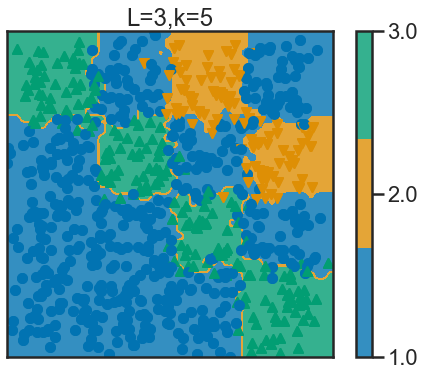

In [29]:
# Implement weights for the kNN classifier


def weights(dist):
    """Returns an array of weights, exponentially decreasing in the square
    of the distance.

    Parameters
    ----------
    dist : a one-dimensional array of distances.

    Returns
    -------
    weight : array of the same size as dist
    """
    # TODO: use weights equal to exp(- dist^2 / 0.1)
    return np.exp(- dist ** 2 / 0.1)
    # return dist


n_neighbors = 5
wknn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
wknn.fit(X_train, Y_train)
plt.figure(4)
plot_2d(X_train, Y_train)


frontiere_new(wknn, X_train, Y_train, w=None, step=50,
              alpha_choice=1, n_neighbors=n_neighbors)


Y_pred=wknn.predict(X_test)
print(f"The accuracy value is {(Y_pred==Y_test).sum()} , {len(Y_test)}")



## walo
 

In [126]:
my_list = np.array([[1, 2, 1, 3, 3, 4, 3],
                    [1, 2, 2, 2, 3, 4, 3], [1, 2, 1, 1, 1, 4, 3], [1, 2, 1, 3, 3, 4, 3]])
# def argmax(a:list):
%timeit np.array([np.unique(a)[np.argmax(np.array([np.sum(np.where(a == i, 1, 0)) for i in np.unique(a)]))] for a in my_list])


246 µs ± 15.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [51]:
%timeit np.array([stats.mode(i, axis=None).mode[0] for i in my_list])


443 µs ± 45.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [112]:
mode, _ = stats.mode(my_list, axis=1)
mode.ravel()


array([3, 2, 1, 3])

In [ ]:
d = pairwise_distances(my_list, self.X_)


In [198]:
# Write your own implementation

class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""

    def __init__(self, n_neighbors=1, weights=None):
        self.n_neighbors = n_neighbors
        self.weights = weights

    def fit(self, X, y):
        # no work is done at fit time, except storing training data
        self.X_ = X
        self.y_ = y
        return self

    def predict(self, X):
        n_samples, n_features = X.shape
        # TODO : Compute all pairwise distances between X and self.X_
        d = pairwise_distances(X, self.X_)

        # TODO : Get indices to sort them
        sorted_indices = np.argsort(d)
        # TODO Get indices of neighbors
        neighbors_indices = sorted_indices[:, :self.n_neighbors]

        # TODO: Get labels of neighbors
        Y_neighbors = self.y_[neighbors_indices]
        # print(d[:, :self.n_neighbors])
        # print(Y_neighbors)
        # print(Y_neighbors*d[:, :self.n_neighbors])

        # TODO : Find the predicted labels y for each entry in X
        # You can use the scipy.stats.mode function
        # y_pred,_ = stats.mode(Y_neighbors,axis=1)
        # ? we consider an empty array
        y_pred = np.array([])
        print(Y_neighbors.shape)
        print(d[:,neighbors_indices].shape)
        for a,j in zip(Y_neighbors,range(len(Y_neighbors))):
            max_ = np.array([])
            #// print(f"unique {np.unique(a)}")
            #// print(f"a  {a}")
            for i in np.unique(a):
                #// print(f"i {i}")
                N_repetitions = np.sum(
                    (a == i) * (self.weights(d[j, neighbors_indices[j]]) if self.weights else 1))
                
                #// print(f"a==i {(a == i) }* {self.weights(d[j, neighbors_indices[j]]) if self.weights else 1}")
                #// print(f"number is {N_repetitions}")
                max_ = np.append(max_, N_repetitions)
            #// print(f"max_{np.argmax(max_)}")
            y_pred = np.append(y_pred, np.unique(a)[np.argmax(max_)])
            #// print(f"y_pred {y_pred}")
        return y_pred.ravel()




# TODO check that all labels match

# From now on use the Scikit-Learn implementation


In [59]:
# Write your own implementation
class KNNClassifier(BaseEstimator, ClassifierMixin):
    """ Home made KNN Classifier class"""

    def __init__(self, n_neighbors=1, weights=None):
        self.n_neighbors = n_neighbors
        self.weights = weights

    def fit(self, X, y):
        # no work is done at fit time, except storing training data
        self.X_ = X
        self.y_ = y
        return self
    def predict(self, X):
        n_samples, n_features = X.shape
        # TODO : Compute all pairwise distances between X and self.X_
        d = pairwise_distances(X, self.X_)

        # TODO : Get indices to sort them
        sorted_indices = np.argsort(d)
        d = np.take_along_axis(d, sorted_indices, axis=1)[:, :self.n_neighbors]
        # TODO Get indices of neighbors
        neighbors_indices = sorted_indices[:, :self.n_neighbors]

        # TODO: Get labels of neighbors
        Y_neighbors = self.y_[neighbors_indices]

        # TODO : Find the predicted labels y for each entry in X
        # You can use the scipy.stats.mode function
        # y_pred,_ = stats.mode(Y_neighbors,axis=1)
        # ? we consider an empty array
        max_ = np.array([])
        for i in np.unique(Y_neighbors):
            N_repetitions = np.sum(
                (Y_neighbors == i) * (self.weights(d) if self.weights else 1), axis=1)
            max_ = np.append(max_, N_repetitions)
        y_pred = np.unique(Y_neighbors)[np.argmax(
            max_.reshape(-1, Y_neighbors.shape[0]).T, axis=1)] if max_.any() else np.array([])
        return y_pred.ravel()


# TODO check that all labels match

# From now on use the Scikit-Learn implementation


In [60]:

# TODO : compare your implementation with scikit-learn
n_neighbors = 4

# Focus on dataset 2
index_train_test = int(4 * (n1_3 + n2_3) / 5)
X_train = X3[:index_train_test]
Y_train = y3[:index_train_test]
X_test = X3[index_train_test:]
Y_test = y3[index_train_test:]

# TODO

# your classifier


In [65]:
knn = KNNClassifier(n_neighbors=n_neighbors, weights=weights)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)


In [66]:
sknn = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
sknn.fit(X_train, Y_train)
Y_pred_skl = sknn.predict(X_test)


In [67]:
print(f"The matching : {(Y_pred==Y_pred_skl).all()}\n")

print(
    f"The accuracy value our model is {(Y_pred==Y_test).sum()} , {len(Y_test)}")
print(
    f"The accuracy value sklearn is {(Y_test==Y_pred_skl).sum()} , {len(Y_test)}")
print(
    f"The accuracy value o!f matching is {(Y_pred==Y_pred_skl).sum()} , {len(Y_test)}")

The matching : True

The accuracy value our model is 175 , 192
The accuracy value sklearn is 175 , 192
The accuracy value o!f matching is 192 , 192


In [269]:
a=np.array([[1,2,3,4,5],
            [5,4,3,2,0]])
ai = np.argsort(a, axis=1)
np.append(a,[[1,2,3,4,5]],axis=0)



array([[1, 2, 3, 4, 5],
       [5, 4, 3, 2, 0],
       [1, 2, 3, 4, 5]])